<a href="https://colab.research.google.com/github/Kevangi/summer-to-winter-cyclegan/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys

In [3]:
sys.path.append('/content/drive/MyDrive/Summer2Winter')

In [4]:
from dataset_loader import get_dataloader

In [5]:
dataset_path = "/content/drive/MyDrive/Summer2Winter/dataset"

In [6]:
dataloader = get_dataloader(dataset_path, batch_size=1)

In [7]:
batch = next(iter(dataloader))

In [8]:
print(batch["A"].shape)
print(batch["B"].shape)

torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])


In [9]:
from models.generator import Generator
from models.discriminator import Discriminator

In [10]:
import torch

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
G = Generator().to(device)
F = Generator().to(device)
D = Discriminator().to(device)

In [13]:
real_image = batch["A"].to(device)

In [14]:
fake_image = G(real_image)
disc_output = D(fake_image)

In [15]:
print("Generator output shape:", fake_image.shape)
print("Discriminator output shape:", disc_output.shape)

Generator output shape: torch.Size([1, 3, 256, 256])
Discriminator output shape: torch.Size([1, 1, 30, 30])


In [16]:
import torch.nn as nn
import torch.optim as optim

In [17]:
D_A = Discriminator().to(device)  # Summer discriminator
D_B = Discriminator().to(device)  # Winter discriminator

In [18]:
# Adversarial loss (LSGAN)
criterion_GAN = nn.MSELoss()

In [19]:
# Cycle consistency loss
criterion_cycle = nn.L1Loss()

In [20]:
# Identity loss
criterion_identity = nn.L1Loss()

In [21]:
lambda_cycle = 10
lambda_identity = 5

In [22]:
optimizer_G = optim.Adam(
    list(G.parameters()) + list(F.parameters()),
    lr=0.0002,
    betas=(0.5, 0.999)
)

In [23]:
optimizer_D_A = optim.Adam(
    D_A.parameters(),
    lr=0.0002,
    betas=(0.5, 0.999)
)

In [24]:
optimizer_D_B = optim.Adam(
    D_B.parameters(),
    lr=0.0002,
    betas=(0.5, 0.999)
)

In [25]:
def get_valid_fake_labels(prediction):
    valid = torch.ones_like(prediction, device=device)
    fake = torch.zeros_like(prediction, device=device)
    return valid, fake

In [26]:
mkdir /content/drive/MyDrive/Summer2Winter/checkpoints

mkdir: cannot create directory ‘/content/drive/MyDrive/Summer2Winter/checkpoints’: File exists


In [27]:
num_epochs = 10

In [28]:
G_losses = []
D_A_losses = []
D_B_losses = []

In [29]:
import matplotlib.pyplot as plt

In [30]:
def show_generated_images(epoch, real_A, real_B):
    G.eval()
    F.eval()

    with torch.no_grad():
        fake_B = G(real_A)
        fake_A = F(real_B)

    def denormalize(img):
        img = img * 0.5 + 0.5
        return img.clamp(0,1)

    real_A_img = denormalize(real_A[0]).permute(1,2,0).cpu()
    fake_B_img = denormalize(fake_B[0]).permute(1,2,0).cpu()

    real_B_img = denormalize(real_B[0]).permute(1,2,0).cpu()
    fake_A_img = denormalize(fake_A[0]).permute(1,2,0).cpu()

    plt.figure(figsize=(8,6))

    plt.subplot(2,2,1)
    plt.title("Real Summer")
    plt.imshow(real_A_img)
    plt.axis("off")

    plt.subplot(2,2,2)
    plt.title("Fake Winter")
    plt.imshow(fake_B_img)
    plt.axis("off")

    plt.subplot(2,2,3)
    plt.title("Real Winter")
    plt.imshow(real_B_img)
    plt.axis("off")

    plt.subplot(2,2,4)
    plt.title("Fake Summer")
    plt.imshow(fake_A_img)
    plt.axis("off")

    plt.suptitle(f"Epoch {epoch}")
    plt.show()

    G.train()
    F.train()

Starting training from scratch.
[Epoch 1/10] [Batch 0/1231] [D_A loss: 0.4964] [D_B loss: 0.5145] [G loss: 20.8285]
[Epoch 1/10] [Batch 100/1231] [D_A loss: 0.2167] [D_B loss: 0.3242] [G loss: 11.1118]
[Epoch 1/10] [Batch 200/1231] [D_A loss: 0.2665] [D_B loss: 0.2157] [G loss: 7.9132]
[Epoch 1/10] [Batch 300/1231] [D_A loss: 0.1850] [D_B loss: 0.1274] [G loss: 8.5971]
[Epoch 1/10] [Batch 400/1231] [D_A loss: 0.3064] [D_B loss: 0.3325] [G loss: 10.1629]
[Epoch 1/10] [Batch 500/1231] [D_A loss: 0.1628] [D_B loss: 0.2183] [G loss: 10.0182]
[Epoch 1/10] [Batch 600/1231] [D_A loss: 0.3433] [D_B loss: 0.1706] [G loss: 12.0209]
[Epoch 1/10] [Batch 700/1231] [D_A loss: 0.0638] [D_B loss: 0.1889] [G loss: 12.3932]
[Epoch 1/10] [Batch 800/1231] [D_A loss: 0.1937] [D_B loss: 0.2391] [G loss: 9.3000]
[Epoch 1/10] [Batch 900/1231] [D_A loss: 0.1322] [D_B loss: 0.2765] [G loss: 8.3360]
[Epoch 1/10] [Batch 1000/1231] [D_A loss: 0.3248] [D_B loss: 0.1383] [G loss: 7.4111]
[Epoch 1/10] [Batch 1100/123

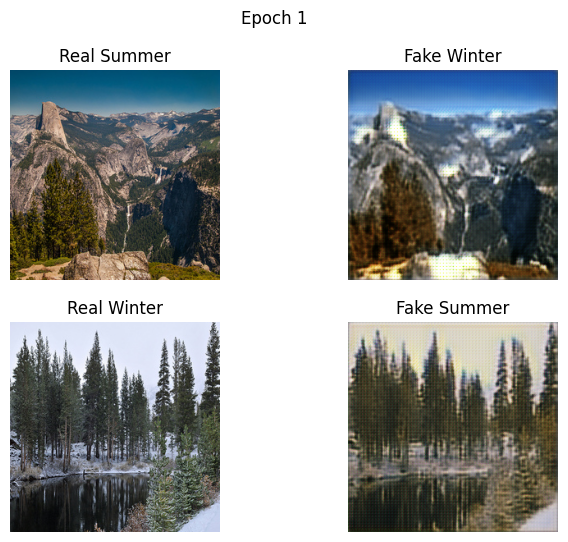

Checkpoint saved at epoch 1
End of Epoch 1/10

[Epoch 2/10] [Batch 0/1231] [D_A loss: 0.0993] [D_B loss: 0.1307] [G loss: 6.0571]
[Epoch 2/10] [Batch 100/1231] [D_A loss: 0.2332] [D_B loss: 0.0912] [G loss: 8.6535]
[Epoch 2/10] [Batch 200/1231] [D_A loss: 0.1205] [D_B loss: 0.1738] [G loss: 7.2988]
[Epoch 2/10] [Batch 300/1231] [D_A loss: 0.1815] [D_B loss: 0.1785] [G loss: 6.4581]
[Epoch 2/10] [Batch 400/1231] [D_A loss: 0.1579] [D_B loss: 0.1878] [G loss: 6.4178]
[Epoch 2/10] [Batch 500/1231] [D_A loss: 0.1785] [D_B loss: 0.1977] [G loss: 10.6926]
[Epoch 2/10] [Batch 600/1231] [D_A loss: 0.1578] [D_B loss: 0.2075] [G loss: 6.3664]
[Epoch 2/10] [Batch 700/1231] [D_A loss: 0.1783] [D_B loss: 0.1945] [G loss: 5.9309]
[Epoch 2/10] [Batch 800/1231] [D_A loss: 0.2100] [D_B loss: 0.1675] [G loss: 8.0322]
[Epoch 2/10] [Batch 900/1231] [D_A loss: 0.1168] [D_B loss: 0.1042] [G loss: 6.3381]
[Epoch 2/10] [Batch 1000/1231] [D_A loss: 0.1973] [D_B loss: 0.3204] [G loss: 7.2693]
[Epoch 2/10] [Batc

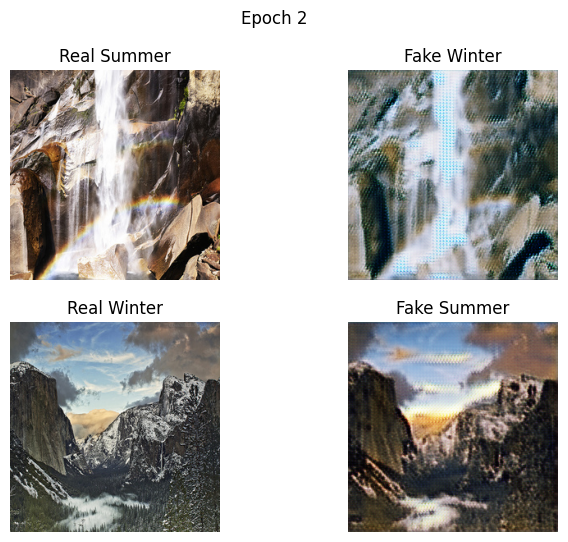

Checkpoint saved at epoch 2
End of Epoch 2/10

[Epoch 3/10] [Batch 0/1231] [D_A loss: 0.2019] [D_B loss: 0.2575] [G loss: 6.2075]
[Epoch 3/10] [Batch 100/1231] [D_A loss: 0.1873] [D_B loss: 0.1776] [G loss: 5.1676]
[Epoch 3/10] [Batch 200/1231] [D_A loss: 0.2276] [D_B loss: 0.2409] [G loss: 5.3547]
[Epoch 3/10] [Batch 300/1231] [D_A loss: 0.1952] [D_B loss: 0.2559] [G loss: 5.6054]
[Epoch 3/10] [Batch 400/1231] [D_A loss: 0.1953] [D_B loss: 0.2662] [G loss: 6.2981]
[Epoch 3/10] [Batch 500/1231] [D_A loss: 0.3402] [D_B loss: 0.2300] [G loss: 6.5496]
[Epoch 3/10] [Batch 600/1231] [D_A loss: 0.1424] [D_B loss: 0.2315] [G loss: 7.2649]
[Epoch 3/10] [Batch 700/1231] [D_A loss: 0.2169] [D_B loss: 0.3348] [G loss: 4.2958]
[Epoch 3/10] [Batch 800/1231] [D_A loss: 0.2053] [D_B loss: 0.2493] [G loss: 4.5551]
[Epoch 3/10] [Batch 900/1231] [D_A loss: 0.2731] [D_B loss: 0.2265] [G loss: 4.6403]
[Epoch 3/10] [Batch 1000/1231] [D_A loss: 0.1251] [D_B loss: 0.2346] [G loss: 7.9585]
[Epoch 3/10] [Batch

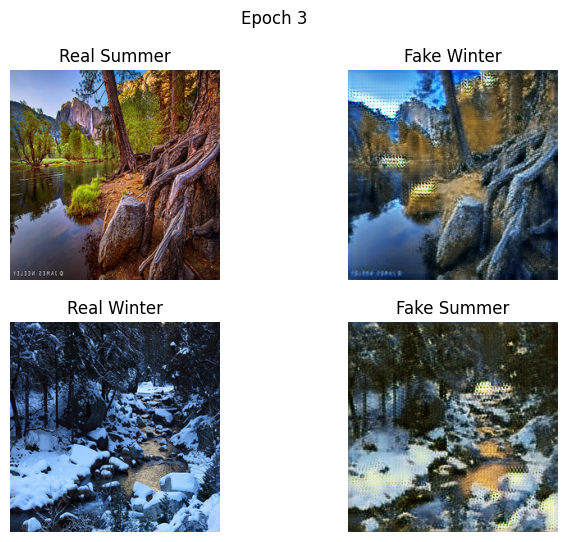

Checkpoint saved at epoch 3
End of Epoch 3/10

[Epoch 4/10] [Batch 0/1231] [D_A loss: 0.1389] [D_B loss: 0.3169] [G loss: 6.2546]
[Epoch 4/10] [Batch 100/1231] [D_A loss: 0.1195] [D_B loss: 0.2212] [G loss: 5.7766]
[Epoch 4/10] [Batch 200/1231] [D_A loss: 0.2563] [D_B loss: 0.3672] [G loss: 7.8199]
[Epoch 4/10] [Batch 300/1231] [D_A loss: 0.1341] [D_B loss: 0.1452] [G loss: 7.0907]
[Epoch 4/10] [Batch 400/1231] [D_A loss: 0.1864] [D_B loss: 0.2860] [G loss: 4.9773]
[Epoch 4/10] [Batch 500/1231] [D_A loss: 0.2638] [D_B loss: 0.2008] [G loss: 5.9611]
[Epoch 4/10] [Batch 600/1231] [D_A loss: 0.2128] [D_B loss: 0.2041] [G loss: 5.9871]
[Epoch 4/10] [Batch 700/1231] [D_A loss: 0.1414] [D_B loss: 0.1494] [G loss: 6.1540]
[Epoch 4/10] [Batch 800/1231] [D_A loss: 0.1401] [D_B loss: 0.1491] [G loss: 6.0709]
[Epoch 4/10] [Batch 900/1231] [D_A loss: 0.3024] [D_B loss: 0.2285] [G loss: 6.9057]
[Epoch 4/10] [Batch 1000/1231] [D_A loss: 0.1243] [D_B loss: 0.3656] [G loss: 5.9412]
[Epoch 4/10] [Batch

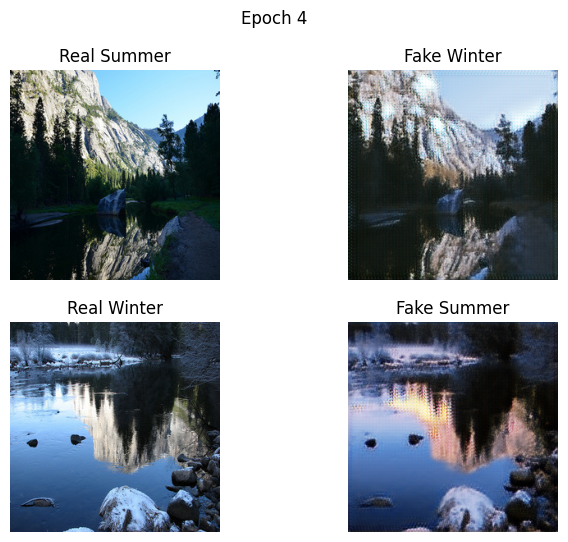

Checkpoint saved at epoch 4
End of Epoch 4/10

[Epoch 5/10] [Batch 0/1231] [D_A loss: 0.2286] [D_B loss: 0.1324] [G loss: 5.0180]
[Epoch 5/10] [Batch 100/1231] [D_A loss: 0.1713] [D_B loss: 0.1900] [G loss: 7.1461]
[Epoch 5/10] [Batch 200/1231] [D_A loss: 0.2442] [D_B loss: 0.1813] [G loss: 5.1531]
[Epoch 5/10] [Batch 300/1231] [D_A loss: 0.2442] [D_B loss: 0.1896] [G loss: 5.4337]
[Epoch 5/10] [Batch 400/1231] [D_A loss: 0.0990] [D_B loss: 0.2170] [G loss: 5.8107]
[Epoch 5/10] [Batch 500/1231] [D_A loss: 0.2130] [D_B loss: 0.1908] [G loss: 7.2386]
[Epoch 5/10] [Batch 600/1231] [D_A loss: 0.2311] [D_B loss: 0.2151] [G loss: 4.7549]
[Epoch 5/10] [Batch 700/1231] [D_A loss: 0.4126] [D_B loss: 0.1594] [G loss: 4.8550]
[Epoch 5/10] [Batch 800/1231] [D_A loss: 0.3001] [D_B loss: 0.1945] [G loss: 6.0050]
[Epoch 5/10] [Batch 900/1231] [D_A loss: 0.1879] [D_B loss: 0.3106] [G loss: 5.2410]
[Epoch 5/10] [Batch 1000/1231] [D_A loss: 0.2014] [D_B loss: 0.1968] [G loss: 4.9839]
[Epoch 5/10] [Batch

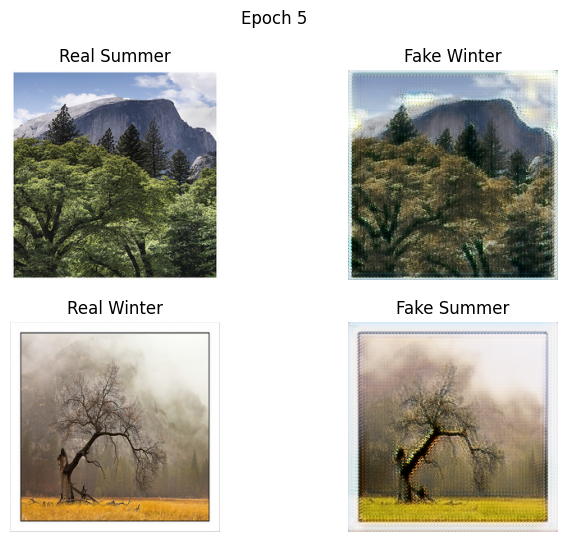

Checkpoint saved at epoch 5
End of Epoch 5/10

[Epoch 6/10] [Batch 0/1231] [D_A loss: 0.1089] [D_B loss: 0.2229] [G loss: 7.2415]
[Epoch 6/10] [Batch 100/1231] [D_A loss: 0.2549] [D_B loss: 0.1637] [G loss: 8.5998]
[Epoch 6/10] [Batch 200/1231] [D_A loss: 0.1525] [D_B loss: 0.2945] [G loss: 6.4179]
[Epoch 6/10] [Batch 300/1231] [D_A loss: 0.2031] [D_B loss: 0.2878] [G loss: 5.1075]
[Epoch 6/10] [Batch 400/1231] [D_A loss: 0.1060] [D_B loss: 0.2760] [G loss: 4.9937]
[Epoch 6/10] [Batch 500/1231] [D_A loss: 0.2335] [D_B loss: 0.2414] [G loss: 6.9806]
[Epoch 6/10] [Batch 600/1231] [D_A loss: 0.2615] [D_B loss: 0.1976] [G loss: 5.6239]
[Epoch 6/10] [Batch 700/1231] [D_A loss: 0.1316] [D_B loss: 0.2221] [G loss: 5.0438]
[Epoch 6/10] [Batch 800/1231] [D_A loss: 0.1548] [D_B loss: 0.2091] [G loss: 5.5489]
[Epoch 6/10] [Batch 900/1231] [D_A loss: 0.2634] [D_B loss: 0.3676] [G loss: 4.6577]
[Epoch 6/10] [Batch 1000/1231] [D_A loss: 0.2141] [D_B loss: 0.2226] [G loss: 5.5190]
[Epoch 6/10] [Batch

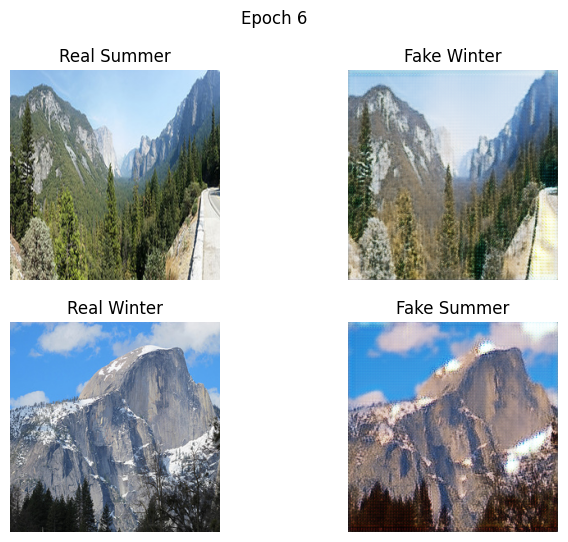

Checkpoint saved at epoch 6
End of Epoch 6/10

[Epoch 7/10] [Batch 0/1231] [D_A loss: 0.2610] [D_B loss: 0.1431] [G loss: 7.6461]
[Epoch 7/10] [Batch 100/1231] [D_A loss: 0.3059] [D_B loss: 0.3057] [G loss: 5.1247]
[Epoch 7/10] [Batch 200/1231] [D_A loss: 0.1711] [D_B loss: 0.1554] [G loss: 4.8174]
[Epoch 7/10] [Batch 300/1231] [D_A loss: 0.1346] [D_B loss: 0.2827] [G loss: 5.5760]
[Epoch 7/10] [Batch 400/1231] [D_A loss: 0.0842] [D_B loss: 0.2401] [G loss: 4.4904]
[Epoch 7/10] [Batch 500/1231] [D_A loss: 0.1510] [D_B loss: 0.1446] [G loss: 5.6161]
[Epoch 7/10] [Batch 600/1231] [D_A loss: 0.2380] [D_B loss: 0.1544] [G loss: 5.3272]
[Epoch 7/10] [Batch 700/1231] [D_A loss: 0.3308] [D_B loss: 0.2706] [G loss: 3.8970]
[Epoch 7/10] [Batch 800/1231] [D_A loss: 0.1651] [D_B loss: 0.1396] [G loss: 6.2682]
[Epoch 7/10] [Batch 900/1231] [D_A loss: 0.1332] [D_B loss: 0.1666] [G loss: 5.9765]
[Epoch 7/10] [Batch 1000/1231] [D_A loss: 0.1465] [D_B loss: 0.2339] [G loss: 7.1825]
[Epoch 7/10] [Batch

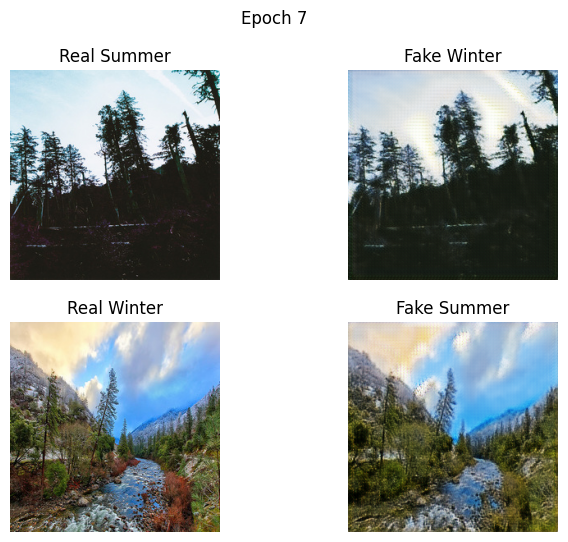

Checkpoint saved at epoch 7
End of Epoch 7/10

[Epoch 8/10] [Batch 0/1231] [D_A loss: 0.2384] [D_B loss: 0.1730] [G loss: 3.4657]
[Epoch 8/10] [Batch 100/1231] [D_A loss: 0.1573] [D_B loss: 0.1661] [G loss: 4.4434]
[Epoch 8/10] [Batch 200/1231] [D_A loss: 0.1831] [D_B loss: 0.1817] [G loss: 4.1896]
[Epoch 8/10] [Batch 300/1231] [D_A loss: 0.2190] [D_B loss: 0.2110] [G loss: 4.7766]
[Epoch 8/10] [Batch 400/1231] [D_A loss: 0.1528] [D_B loss: 0.1741] [G loss: 4.9104]
[Epoch 8/10] [Batch 500/1231] [D_A loss: 0.2191] [D_B loss: 0.2435] [G loss: 4.1626]
[Epoch 8/10] [Batch 600/1231] [D_A loss: 0.1087] [D_B loss: 0.1765] [G loss: 4.8761]
[Epoch 8/10] [Batch 700/1231] [D_A loss: 0.1193] [D_B loss: 0.1634] [G loss: 5.1577]
[Epoch 8/10] [Batch 800/1231] [D_A loss: 0.2055] [D_B loss: 0.2670] [G loss: 4.9046]
[Epoch 8/10] [Batch 900/1231] [D_A loss: 0.3407] [D_B loss: 0.2167] [G loss: 5.2339]
[Epoch 8/10] [Batch 1000/1231] [D_A loss: 0.2073] [D_B loss: 0.2309] [G loss: 4.9201]
[Epoch 8/10] [Batch

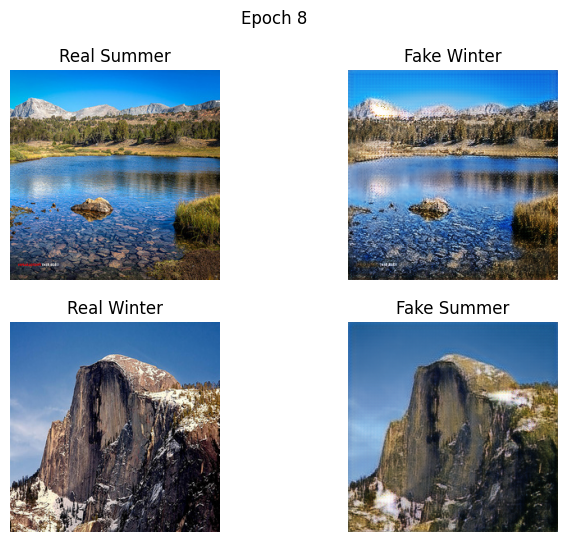

Checkpoint saved at epoch 8
End of Epoch 8/10

[Epoch 9/10] [Batch 0/1231] [D_A loss: 0.2457] [D_B loss: 0.3599] [G loss: 3.5152]
[Epoch 9/10] [Batch 100/1231] [D_A loss: 0.1863] [D_B loss: 0.2130] [G loss: 4.7554]
[Epoch 9/10] [Batch 200/1231] [D_A loss: 0.2352] [D_B loss: 0.2333] [G loss: 3.8920]
[Epoch 9/10] [Batch 300/1231] [D_A loss: 0.1267] [D_B loss: 0.1888] [G loss: 5.1194]
[Epoch 9/10] [Batch 400/1231] [D_A loss: 0.1907] [D_B loss: 0.2864] [G loss: 3.2950]
[Epoch 9/10] [Batch 500/1231] [D_A loss: 0.2527] [D_B loss: 0.2893] [G loss: 5.7397]
[Epoch 9/10] [Batch 600/1231] [D_A loss: 0.2028] [D_B loss: 0.1067] [G loss: 4.3423]
[Epoch 9/10] [Batch 700/1231] [D_A loss: 0.0750] [D_B loss: 0.2215] [G loss: 6.5605]
[Epoch 9/10] [Batch 800/1231] [D_A loss: 0.2948] [D_B loss: 0.2344] [G loss: 3.9143]
[Epoch 9/10] [Batch 900/1231] [D_A loss: 0.2342] [D_B loss: 0.2179] [G loss: 4.4637]
[Epoch 9/10] [Batch 1000/1231] [D_A loss: 0.2415] [D_B loss: 0.3102] [G loss: 3.9030]
[Epoch 9/10] [Batch

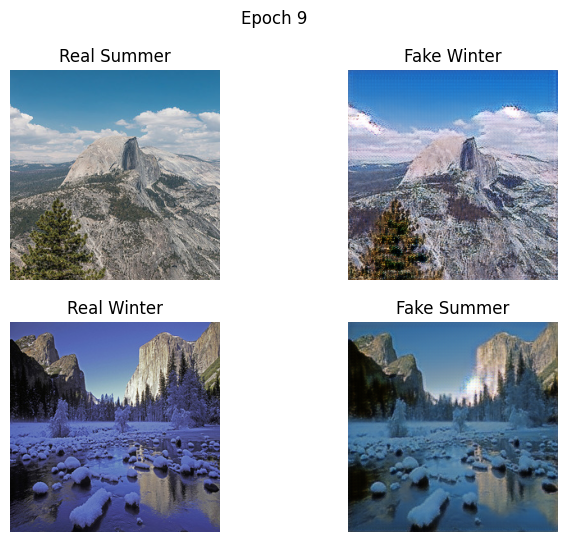

Checkpoint saved at epoch 9
End of Epoch 9/10

[Epoch 10/10] [Batch 0/1231] [D_A loss: 0.2213] [D_B loss: 0.3000] [G loss: 3.8728]
[Epoch 10/10] [Batch 100/1231] [D_A loss: 0.2368] [D_B loss: 0.2417] [G loss: 4.5610]
[Epoch 10/10] [Batch 200/1231] [D_A loss: 0.2047] [D_B loss: 0.1521] [G loss: 4.5466]
[Epoch 10/10] [Batch 300/1231] [D_A loss: 0.2344] [D_B loss: 0.2177] [G loss: 5.1956]
[Epoch 10/10] [Batch 400/1231] [D_A loss: 0.2046] [D_B loss: 0.2445] [G loss: 3.3709]
[Epoch 10/10] [Batch 500/1231] [D_A loss: 0.2240] [D_B loss: 0.2575] [G loss: 4.2695]
[Epoch 10/10] [Batch 600/1231] [D_A loss: 0.2238] [D_B loss: 0.1425] [G loss: 4.2415]
[Epoch 10/10] [Batch 700/1231] [D_A loss: 0.1752] [D_B loss: 0.2610] [G loss: 3.8770]
[Epoch 10/10] [Batch 800/1231] [D_A loss: 0.1789] [D_B loss: 0.1959] [G loss: 5.2540]
[Epoch 10/10] [Batch 900/1231] [D_A loss: 0.2676] [D_B loss: 0.2574] [G loss: 4.5230]
[Epoch 10/10] [Batch 1000/1231] [D_A loss: 0.2691] [D_B loss: 0.2651] [G loss: 4.0793]
[Epoch 1

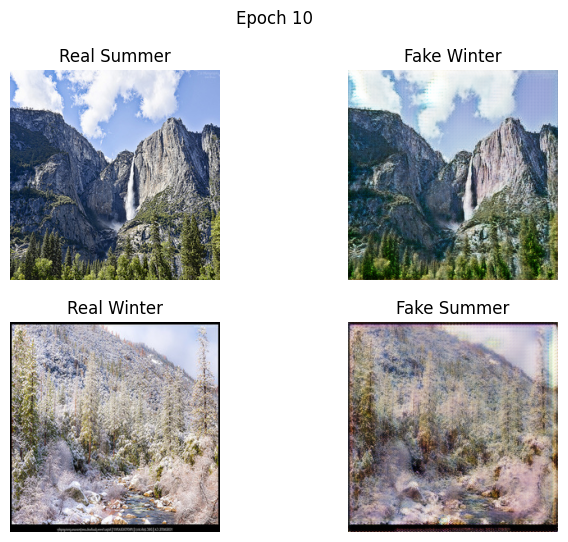

Checkpoint saved at epoch 10
End of Epoch 10/10



In [31]:
import os
import glob

start_epoch = 0
checkpoint_dir = "/content/drive/MyDrive/Summer2Winter/checkpoints"
checkpoints = sorted(glob.glob(os.path.join(checkpoint_dir, "cyclegan_epoch_*.pth")))

if checkpoints:
    latest_checkpoint = checkpoints[-1]
    print("Loading checkpoint:", latest_checkpoint)

    checkpoint = torch.load(latest_checkpoint, map_location=device)

    G.load_state_dict(checkpoint["G_state_dict"])
    F.load_state_dict(checkpoint["F_state_dict"])
    D_A.load_state_dict(checkpoint["D_A_state_dict"])
    D_B.load_state_dict(checkpoint["D_B_state_dict"])

    optimizer_G.load_state_dict(checkpoint["optimizer_G_state_dict"])
    optimizer_D_A.load_state_dict(checkpoint["optimizer_D_A_state_dict"])
    optimizer_D_B.load_state_dict(checkpoint["optimizer_D_B_state_dict"])

    start_epoch = checkpoint["epoch"]
    print(f"Resuming from epoch {start_epoch}")
else:
    print("Starting training from scratch.")

for epoch in range(start_epoch, num_epochs):

    for i, batch in enumerate(dataloader):

        # Load Real Images
        real_A = batch["A"].to(device)  # Summer
        real_B = batch["B"].to(device)  # Winter

        # 1️ Train Generators (G & F)
        optimizer_G.zero_grad()

        # ---- Identity Loss ----
        identity_A = F(real_A)
        loss_identity_A = criterion_identity(identity_A, real_A)

        identity_B = G(real_B)
        loss_identity_B = criterion_identity(identity_B, real_B)

        loss_identity = (loss_identity_A + loss_identity_B) * lambda_identity

        # ---- GAN Loss ----
        fake_B = G(real_A)
        pred_fake_B = D_B(fake_B)
        valid = torch.ones_like(pred_fake_B, device=device)
        loss_GAN_AB = criterion_GAN(pred_fake_B, valid)

        fake_A = F(real_B)
        pred_fake_A = D_A(fake_A)
        valid = torch.ones_like(pred_fake_A, device=device)
        loss_GAN_BA = criterion_GAN(pred_fake_A, valid)

        # ---- Cycle Consistency Loss ----
        recovered_A = F(fake_B)
        loss_cycle_A = criterion_cycle(recovered_A, real_A)

        recovered_B = G(fake_A)
        loss_cycle_B = criterion_cycle(recovered_B, real_B)

        loss_cycle = (loss_cycle_A + loss_cycle_B) * lambda_cycle

        # ---- Total Generator Loss ----
        loss_G = loss_identity + loss_GAN_AB + loss_GAN_BA + loss_cycle

        loss_G.backward()
        optimizer_G.step()

        # 2 Train Discriminator A
        optimizer_D_A.zero_grad()

        # Real Loss
        pred_real = D_A(real_A)
        valid = torch.ones_like(pred_real, device=device)
        loss_real = criterion_GAN(pred_real, valid)

        # Fake Loss
        pred_fake = D_A(fake_A.detach())
        fake = torch.zeros_like(pred_fake, device=device)
        loss_fake = criterion_GAN(pred_fake, fake)

        loss_D_A = (loss_real + loss_fake) * 0.5

        loss_D_A.backward()
        optimizer_D_A.step()

        # 3️ Train Discriminator B
        optimizer_D_B.zero_grad()

        # Real Loss
        pred_real = D_B(real_B)
        valid = torch.ones_like(pred_real, device=device)
        loss_real = criterion_GAN(pred_real, valid)

        # Fake Loss
        pred_fake = D_B(fake_B.detach())
        fake = torch.zeros_like(pred_fake, device=device)
        loss_fake = criterion_GAN(pred_fake, fake)

        loss_D_B = (loss_real + loss_fake) * 0.5

        loss_D_B.backward()
        optimizer_D_B.step()

        # Store losses
        G_losses.append(loss_G.item())
        D_A_losses.append(loss_D_A.item())
        D_B_losses.append(loss_D_B.item())


        # Print Progress
        if i % 100 == 0:
            print(
                f"[Epoch {epoch+1}/{num_epochs}] "
                f"[Batch {i}/{len(dataloader)}] "
                f"[D_A loss: {loss_D_A.item():.4f}] "
                f"[D_B loss: {loss_D_B.item():.4f}] "
                f"[G loss: {loss_G.item():.4f}]"
            )

    checkpoint_path = os.path.join(
        checkpoint_dir,
        f"cyclegan_epoch_{epoch+1}.pth"
    )

    torch.save({
        "epoch": epoch + 1,
        "G_state_dict": G.state_dict(),
        "F_state_dict": F.state_dict(),
        "D_A_state_dict": D_A.state_dict(),
        "D_B_state_dict": D_B.state_dict(),
        "optimizer_G_state_dict": optimizer_G.state_dict(),
        "optimizer_D_A_state_dict": optimizer_D_A.state_dict(),
        "optimizer_D_B_state_dict": optimizer_D_B.state_dict(),
    }, checkpoint_path)

    # Show generated images after each epoch
    show_generated_images(epoch+1, real_A, real_B)


    print(f"Checkpoint saved at epoch {epoch+1}")
    print(f"End of Epoch {epoch+1}/{num_epochs}\n")

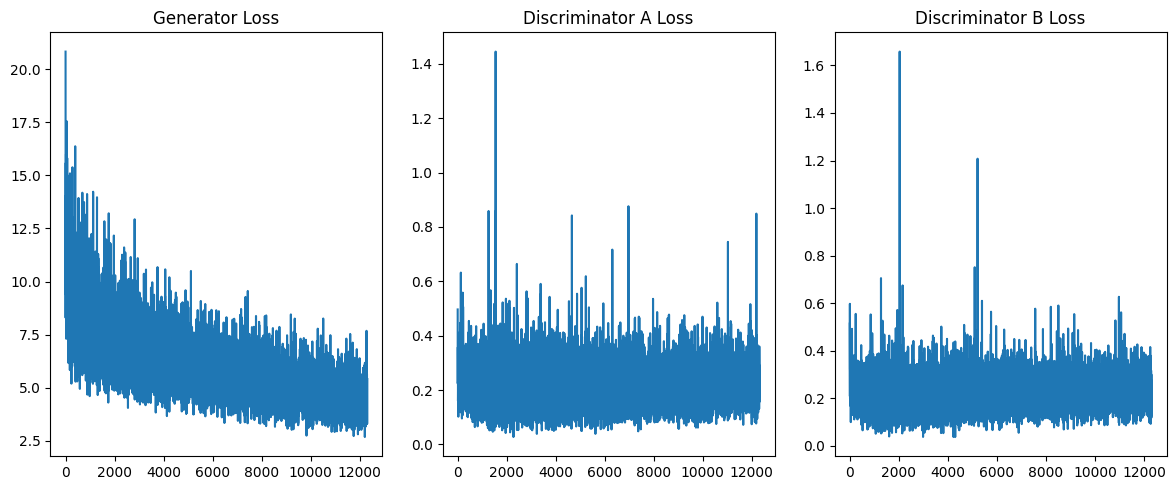

In [32]:
# Plot Loss Curves
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.plot(G_losses)
plt.title("Generator Loss")

plt.subplot(1,3,2)
plt.plot(D_A_losses)
plt.title("Discriminator A Loss")

plt.subplot(1,3,3)
plt.plot(D_B_losses)
plt.title("Discriminator B Loss")

plt.tight_layout()
plt.show()